# Appendix D.2 After handwashing policy at Vienna General, June 1847 to March 1849

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
vienna_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/impact-of-handwashing-death-to-birth-rates.csv'
# Vienna General dataset url
vienna_df = get_data(vienna_url)

# Make 'MonthYear' column dtype string
vienna_df['MonthYear'] = vienna_df['MonthYear'].astype('string')

# Show first 10 lines of vienna_df
vienna_df.dtypes

Hospital      object
Stage         object
Month         object
Year           int64
MonthYear     string
Births       float64
Deaths       float64
Rate         float64
dtype: object

### Drop unnecessary columns from vienna_df

In [3]:
vienna_df = vienna_df[[#'Hospital', 
                       'Stage',  
                       'MonthYear', 
                       #'Births', 
                       #'Deaths',
                       'Rate', 
                       #'Note'
                    ]]
vienna_df

,Stage,MonthYear,Rate
0,Before handwashing,Jan-41,14.6
1,Before handwashing,Feb-41,7.5
2,Before handwashing,Mar-41,4.3
3,Before handwashing,Apr-41,1.6
4,Before handwashing,May-41,0.8
...,...,...,...
94,After handwashing,Nov-48,2.9
95,After handwashing,Dec-48,1.3
96,After handwashing,Jan-49,2.2
97,After handwashing,Feb-49,3.1


### Split vienna_df into before_df and after_df

In [4]:
before_df = vienna_df[vienna_df['Stage'] == 'Before handwashing'].copy()
after_df = vienna_df[vienna_df['Stage'] == 'After handwashing'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [5]:
# Calculate the moving ranges for after_df
after_df['Moving Ranges'] = abs(after_df['Rate'].diff())
after_df

,Stage,MonthYear,Rate,Moving Ranges
0,After handwashing,Jun-47,2.2,NaN
1,After handwashing,Jul-47,1.2,1.0
2,After handwashing,Aug-47,1.9,0.7
3,After handwashing,Sep-47,4.6,2.7
4,After handwashing,Oct-47,4.0,0.6
5,After handwashing,Nov-47,4.5,0.5
6,After handwashing,Dec-47,2.9,1.6
7,After handwashing,Jan-48,3.5,0.6
8,After handwashing,Feb-48,0.7,2.8
9,After handwashing,Mar-48,0.0,0.7


## Step 3. Calculate the average moving range

In [6]:
# Calculate the average moving range for before_df['Moving Ranges']
after_ave_mR = round(after_df['Moving Ranges'].mean(),2)
after_ave_mR

1.02

## Step 4. Calculate the mean

In [7]:
# Calculate the mean before_df['Rate']
after_mean = round(after_df['Rate'].mean(),2)
after_mean

2.11

## Step 5. Calculate the process limits

In [8]:
# Upper Process Limit (UPL)
after_UPL = round(after_mean + (2.660*after_ave_mR),2)
# Lower Process Limit (LPL)
after_LPL = round(after_mean - (2.660*after_ave_mR),2)
after_LPL = max(0, after_LPL)
# Upper Process Limit (UPL)
after_URL = round(3.268*after_ave_mR,2)
# Show results
print('UPL', after_UPL)
print('LPL', after_LPL)
print('URL', after_URL)

UPL 4.82
LPL 0
URL 3.33


## Step 6. Put it all together

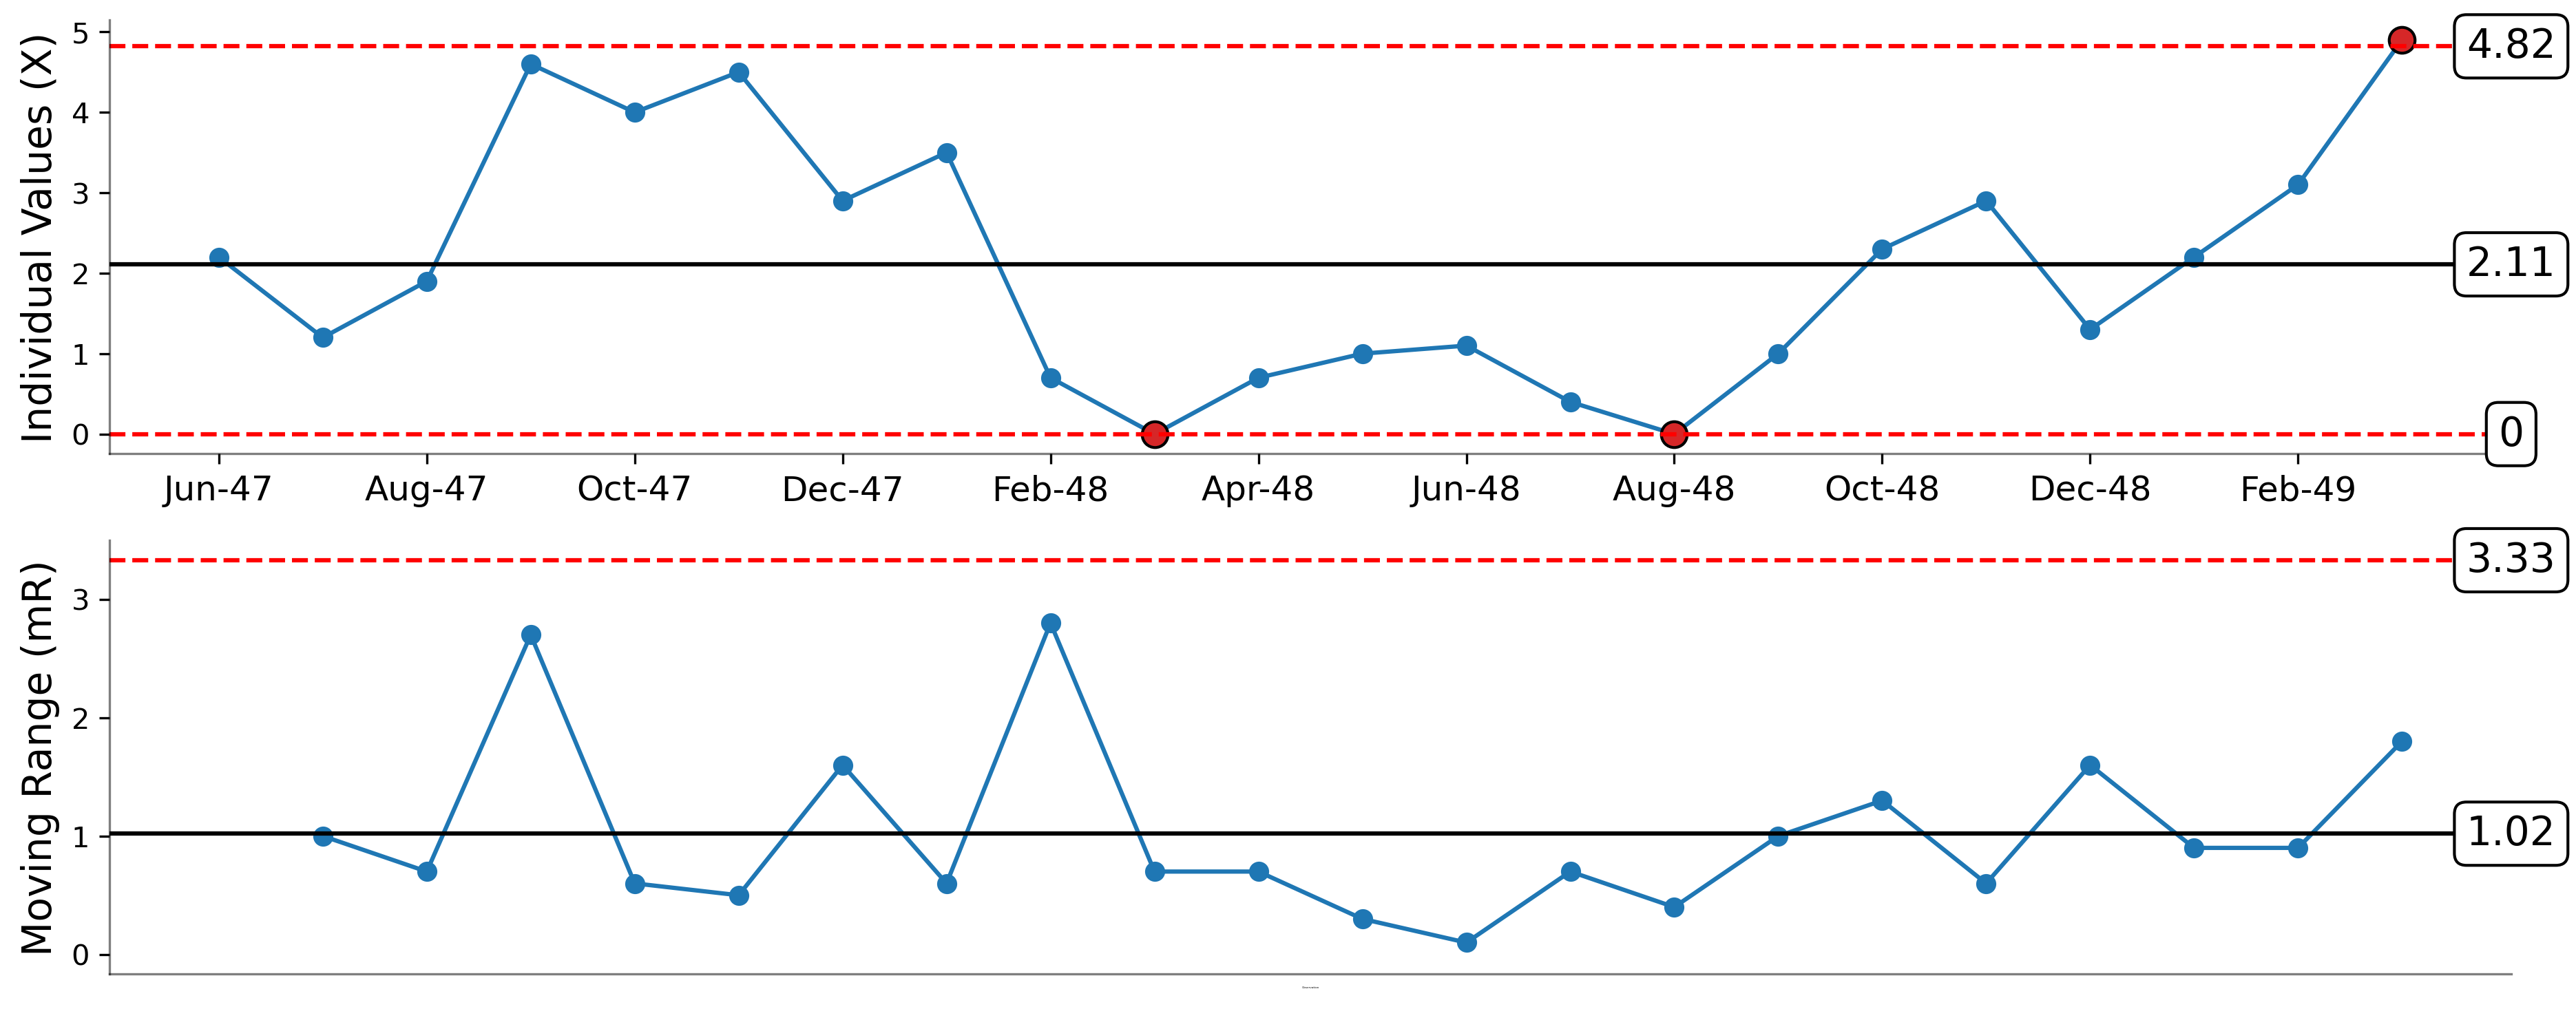

In [10]:
after_results = xmr.xmr_chart(after_df,
                                'Rate',
                                'MonthYear',
                                tickinterval=2, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12)